# Single output study (XMR 5399)

Notebook to accompany GitHub issue: [Enforce minimum of 2 outputs per transaction at the consensus level #5399](https://github.com/monero-project/monero/issues/5399) opened by Isthmus

Apr 2019 // [Neptune Research](https://github.com/NeptuneResearch/) and [Isthmus](https://github.com/mitchellpkt)


# Issue

Typical transactions have at least 2 outputs: change + recipient(s). This is already implemented in the core software.

Thus, any transaction with a single output leaks two pieces of information:

-  The transaction is probably churn or a sweep
-  The user is employing non-standard software

As far as I know, enforcing >= 2 outputs per transaction at the consensus level will not impact any entities using correctly-designed software. This will be a forcing function to ensure that all wallets generate transactions that are indistinguishable (in this respect) from transactions constructed by the core software. 

## Import Libraries

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

## Import data

In [2]:
df = pandas.read_csv('tx_ringct_1_out.csv')

Let's take a look at one of the single-output transactions: [2b2955caed0974f46b43e3ca83d1b47a14eddae402c5d47c44397b15fb05b2a2](https://xmrchain.net/tx/2b2955caed0974f46b43e3ca83d1b47a14eddae402c5d47c44397b15fb05b2a2)

## How many single-output RingCT transactions occurred?

In [3]:
len(df)

2522

## When have single-output transactions occurred?

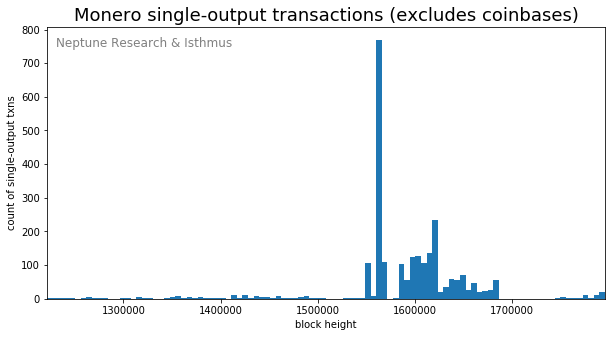

In [4]:
fig, ax = plt.subplots(figsize=(10, 5),facecolor='w')
plt.hist(df.height, bins = 100)
plt.title('Monero single-output transactions (excludes coinbases)',size=18)
ax.set_xlabel('block height')
ax.set_ylabel('count of single-output txns')
plt.axis('tight')
plt.xlim(np.min(df.height), np.max(df.height))
plt.text(1230000, 750, 'Neptune Research & Isthmus',size=12, color='gray');

## Observations
From the above plots:
-  Single-output transactions (1OTXs) are a persistent intermittent phenomena
-  There was a surge of 1OTXs around height 1562000
-  1OTXs are observed to this day

Additional research discovered that 1OTXs often contain additional information leaks:
-  Unusually high fees (orders of magnitude above the block median)
-  Naturally, many 1OTXs contain a large number of inputs, often using uniform decoy selection, revealing spends en masse
-  Unusual and high ring size (before it was fixed)
